<a href="https://colab.research.google.com/github/KavindiPathiraja/Deep-Learning-Lab7-part2/blob/main/Markov_Decision_Process_fixed_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov Decision Process (MDP)

### Ransalu Senanayake

In [1]:
import copy
import timeit
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets

Create the following grid world.

**States:** A 10x10 grid

**Actions:** Up, Down, Left, Right

**Tranistion probabilities:**
* 0.7 in the direction of action
* 0.1 in the three other directions
* The robot bounces back to the same state near edges

**Rewards:**
* (7,8) has a reward +10
* (2,7) has a reward +3
* (4,3) has a reward -5
* (7,3) has a reward -10
* No reward in other states

This example is based on Decision Making Under Uncertainty by M.J. Kochenderfer.

In [2]:
#Let's define MDP paras
def createGrid10World():
    def xy2s(y, x):
        x = max(x, 0)
        y = max(y, 0)
        x = min(x, 9)
        y = min(y, 9)
        out = np.ravel_multi_index(np.array([x,y]), (10,10))
        return out

    def s2xy(s):
        x, y = np.unravel_index(s, (10,10))
        return y, x

    def gridPlot(ax, im, title='', cmap='Blues'):
        pl.imshow(im, interpolation='none', cmap=cmap, origin='lower')
        pl.colorbar()
        ax.set_xticks(np.arange(0, 10, 1));
        ax.set_yticks(np.arange(0, 10, 1));
        ax.set_xticklabels(np.arange(0, 10, 1));
        ax.set_yticklabels(np.arange(0, 10, 1));
        ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
        ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
        pl.title(title);
        return

    A = ['left', 'right', 'up', 'down']
    S = np.arange(100)
    T = np.zeros((len(S), len(A), len(S)))
    R = np.zeros((len(S), len(A)))
    for s in S:
        x, y = s2xy(s)
        if x == 2 and y == 7:
            R[s, :] = 3
        elif x == 7 and y == 8:
            R[s, :] = 10
        else:
            if x == 7 and y == 3:
                R[s, :] = -10
            elif x == 4 and y == 3:
                R[s, :] = -5
            elif x == 0:
                if y == 0 or y == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 0] = -0.7
            elif x == 9:
                if y == 0 or y == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 1] = -0.7
            elif y == 0:
                if x == 0 or x == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 3] = -0.7
            elif y == 9:
                if x == 0 or x == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 2] = -0.7

            for a in A:
                if a == 'left':
                    T[s, 0, xy2s(x - 1, y)] += 0.7
                    T[s, 0, xy2s(x + 1, y)] += 0.1
                    T[s, 0, xy2s(x, y - 1)] += 0.1
                    T[s, 0, xy2s(x, y + 1)] += 0.1
                elif a == 'right':
                    T[s, 1, xy2s(x + 1, y)] += 0.7
                    T[s, 1, xy2s(x - 1, y)] += 0.1
                    T[s, 1, xy2s(x, y - 1)] += 0.1
                    T[s, 1, xy2s(x, y + 1)] += 0.1
                elif a == 'up':
                    T[s, 2, xy2s(x, y + 1)] += 0.7
                    T[s, 2, xy2s(x, y - 1)] += 0.1
                    T[s, 2, xy2s(x - 1, y)] += 0.1
                    T[s, 2, xy2s(x + 1, y)] += 0.1
                elif a == 'down':
                    T[s, 3, xy2s(x, y - 1)] += 0.7
                    T[s, 3, xy2s(x, y + 1)] += 0.1
                    T[s, 3, xy2s(x - 1, y)] += 0.1
                    T[s, 3, xy2s(x + 1, y)] += 0.1

    for a, c_x, c_y in [(0,0,0), (0,0,9),(1,9,0),(1,9,9),(2,0,9),(2,9,9),(3,0,0),(3,9,0)]:
        R[xy2s(c_x,c_y),a] = -0.8

    discount = 0.9

    nextStates = {}
    for si in range(len(S)):
        for ai in range(len(A)):
            nextStates[(si,ai)] = np.where((T[si, ai, :] != 0) == True)[0]

    return {'S':S, 'A':A, 'T':T, 'R':R, 'discount':discount, 'nextStates':nextStates, 'gridPlot':gridPlot, 'xy2s':xy2s, 's2xy':s2xy}

In [3]:
class MDP():
    def __init__(self):
        pass

    def inbuilt_init(self, mdp_dict):
        self.S = mdp_dict['S']
        self.A = mdp_dict['A']
        self.T = mdp_dict['T']
        self.R = mdp_dict['R']
        self.discount = mdp_dict['discount']
        self.nextStates = mdp_dict['nextStates']
        self.gridPlot = mdp_dict['gridPlot']
        self.xy2s = mdp_dict['xy2s']
        self.s2xy = mdp_dict['s2xy']

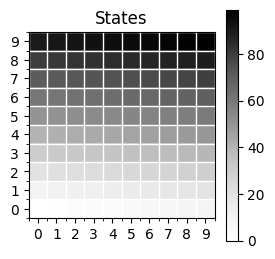

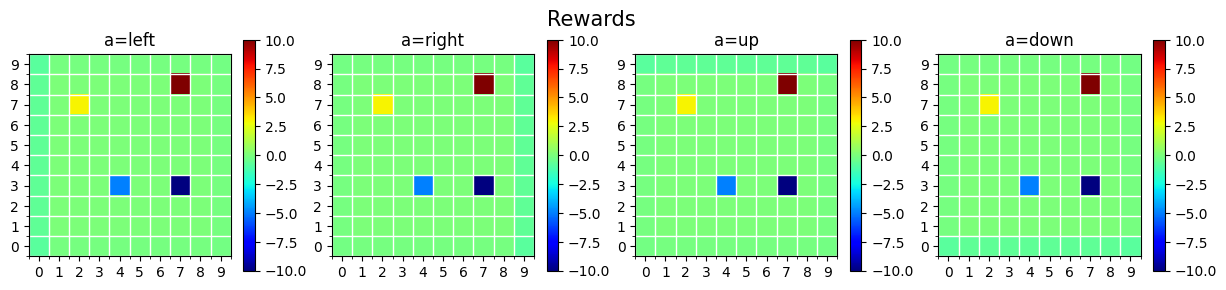

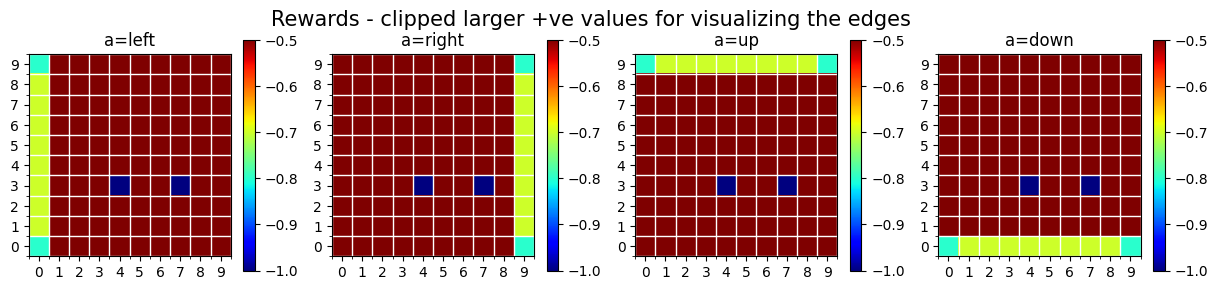

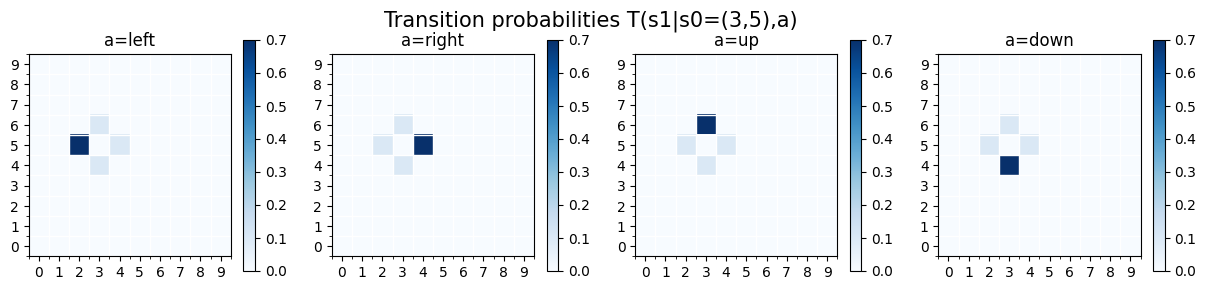

In [4]:
#Define the MDP
mdp = MDP()
mdp.inbuilt_init(mdp_dict=createGrid10World())

#Plot states
pl.figure(figsize=(3,3))
mdp.gridPlot(ax=pl.gca(), im=mdp.S.reshape((10,10)), title='States', cmap='Greys')

#Plot rewards
pl.figure(figsize=(15,3))
pl.suptitle('Rewards', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=mdp.R[:,a].reshape((10,10)), title='a='+mdp.A[a], cmap='jet')
pl.show()

#Plot rewards
pl.figure(figsize=(15,3))
pl.suptitle('Rewards - clipped larger +ve values for visualizing the edges', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=np.clip(mdp.R[:,a].reshape((10,10)), -1, -0.5), title='a='+mdp.A[a], cmap='jet')
pl.show()

#Plot rewards
s0_x, s0_y = 3, 5
s0 = mdp.xy2s(s0_x, s0_y)
pl.figure(figsize=(15,3))
pl.suptitle('Transition probabilities T(s1|s0=({},{}),a)'.format(s0_x, s0_y), fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=mdp.T[s0,a,:].reshape((10,10)), title='a='+mdp.A[a], cmap='Blues')
pl.show()

In [5]:
#An interactive plot of transition probabilities
def f(s0_x, s0_y, action):
    a = mdp.A.index(action)
    s0 = mdp.xy2s(int(s0_x), int(s0_y))
    pl.figure(figsize=(6,6))
    title = 'Transition probabilities T(s1|s0=({},{}),a={})'.format(int(s0_x),int(s0_y),action)
    mdp.gridPlot(ax=pl.gca(), im=mdp.T[s0,a,:].reshape((10,10)), title=title, cmap='Blues')
    pl.show()

interactive_plot = interactive(f, s0_x='4', s0_y='5', action=widgets.ToggleButtons(options=['left', 'right', 'up', 'down']))
interactive_plot

interactive(children=(Text(value='4', description='s0_x'), Text(value='5', description='s0_y'), ToggleButtons(…

### 1. Policy evaluation

Computing the utility, U.

$U^\pi_k(s) = R(s, \pi(s)) + \gamma \sum_{s'} T(s' \mid s, \pi(s))U^\pi_{k-1}(s')$

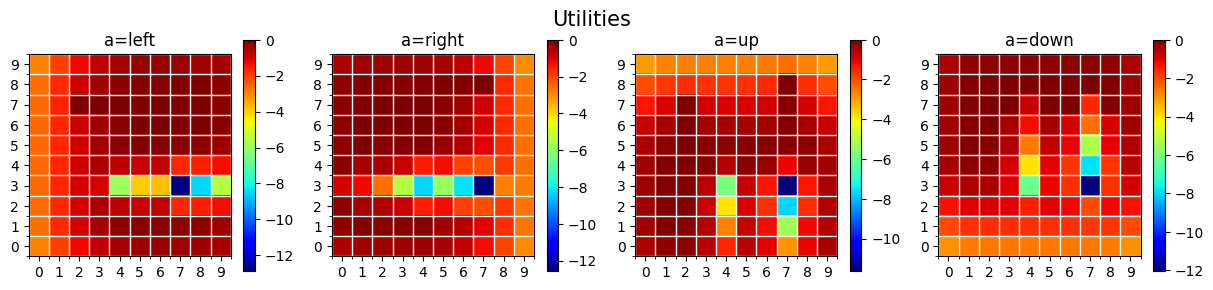

In [7]:
def iterativePolicyEvaluation(mdp, policy, numIterations=10):
    U = np.zeros(len(mdp.S))
    U_old = copy.copy(U)
    for t in range(numIterations):
        U_old = copy.copy(U)
        for s in mdp.S:   # for each state
            a = policy if isinstance(policy, int) else policy[s]
            total = 0.0
            # Iterate over possible next states and their probabilities
            for next_state in mdp.nextStates[(s, a)]:
                prob = mdp.T[s, a, next_state]
                reward = mdp.R[s, a]
                total += prob * (reward + mdp.discount * U_old[next_state])
            U[s] = total
    return U

numIterations = 5
pl.figure(figsize=(15,3))
pl.suptitle('Utilities', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    U = iterativePolicyEvaluation(mdp=mdp, policy=a, numIterations=numIterations)
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='a='+mdp.A[a], cmap='jet')
pl.show()
#print(np.round(U.reshape(10,10),3))

In [8]:
def f(action, numIter=1):
    U = iterativePolicyEvaluation(mdp, policy=mdp.A.index(action), numIterations=numIter)
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
    pl.show()

interactive_plot = interactive(f, action=widgets.ToggleButtons(options=['left', 'right', 'up', 'down']),
                               numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(ToggleButtons(description='action', options=('left', 'right', 'up', 'down'), value='left…

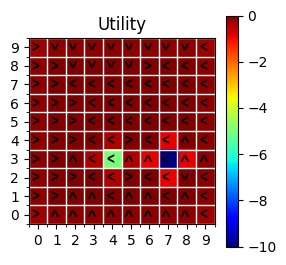

In [10]:
#Value iteration
def valueIteration(mdp, numIterations=1):
    U = np.zeros(len(mdp.S))
    U_old = copy.copy(U)
    for t in range(numIterations):
        U_old = copy.copy(U)
        for s in mdp.S:
            q_values = []
            for a_idx, a in enumerate(mdp.A):
                q = 0.0
                # Iterate over possible next states and their probabilities
                for next_state in mdp.nextStates[(s, a_idx)]:
                    prob = mdp.T[s, a_idx, next_state]
                    reward = mdp.R[s, a_idx]
                    q += prob * (reward + mdp.discount * U_old[next_state])
                q_values.append(q)
            U[s] = max(q_values)   # Bellman optimality update
    return U

def policyExtration(mdp, U):
    policy = np.zeros(len(mdp.S), dtype=int)
    for s in mdp.S:
        q_values = []
        for a_idx, a in enumerate(mdp.A):
            q = 0.0
            # Iterate over possible next states and their probabilities
            for next_state in mdp.nextStates[(s, a_idx)]:
                prob = mdp.T[s, a_idx, next_state]
                reward = mdp.R[s, a_idx]
                q += prob * (reward + mdp.discount * U[next_state])
            q_values.append(q)
        policy[s] = np.argmax(q_values)
    return policy

U = valueIteration(mdp, numIterations=2)
policy = policyExtration(mdp, U=U)
pl.figure(figsize=(3,3))
mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
for s in range(100):
    x, y = mdp.s2xy(s)
    if policy[s] == 0:
        m='\u02C2'
    elif policy[s] == 1:
        m='\u02C3'
    elif policy[s] == 2:
        m='\u02C4'
    elif policy[s] == 3:
        m='\u02C5'
    pl.text(x-0.5,y-1,m,color='k',size=20)
pl.show()

In [11]:
def f(numIter=1):
    start_time = timeit.default_timer()
    U = valueIteration(mdp, numIterations=numIter)
    policy = policyExtration(mdp, U=U)
    elapsed = timeit.default_timer() - start_time
    print('time=', np.round(elapsed*1000,2))
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
    for s in range(100):
        x, y = mdp.s2xy(s)
        if policy[s] == 0:
            m='\u02C2'
        elif policy[s] == 1:
            m='\u02C3'
        elif policy[s] == 2:
            m='\u02C4'
        elif policy[s] == 3:
            m='\u02C5'
        pl.text(x-0.5,y-1,m,color='k',size=20)
    pl.show()

interactive_plot = interactive(f, numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(IntSlider(value=0, description='numIter', max=20), Output()), _dom_classes=('widget-inte…

### 2. Policy iteration

Policy evaluation can be used in policy iteration:
1. Given the current policy, compute U
2. Using U, compute a new policy

In [13]:
def policyIteration(mdp, numIterations=1, tol=1e-6):
    U_pi_k = np.zeros(len(mdp.S))  # initial utilities
    pi_k = np.random.randint(low=0, high=len(mdp.A), size=len(mdp.S), dtype=int)  # random initial policy
    pi_kp1 = copy.copy(pi_k)

    for t in range(numIterations):
        # ---------- Policy Evaluation ----------
        while True:
            delta = 0
            U_old = copy.copy(U_pi_k)
            for s in mdp.S:
                a = pi_k[s]
                val = 0.0
                for next_state in mdp.nextStates[(s, a)]:
                    prob = mdp.T[s, a, next_state]
                    reward = mdp.R[s, a]
                    val += prob * (reward + mdp.discount * U_old[next_state])
                U_pi_k[s] = val
                delta = max(delta, abs(U_pi_k[s] - U_old[s]))
            if delta < tol:
                break

        # ---------- Policy Improvement ----------
        policy_stable = True
        for s in mdp.S:
            old_action = pi_k[s]
            q_values = []
            for a_idx, a in enumerate(mdp.A):
                q = 0.0
                for next_state in mdp.nextStates[(s, a_idx)]:
                    prob = mdp.T[s, a_idx, next_state]
                    reward = mdp.R[s, a_idx]
                    q += prob * (reward + mdp.discount * U_pi_k[next_state])
                q_values.append(q)
            pi_kp1[s] = np.argmax(q_values)
            if pi_kp1[s] != old_action:
                policy_stable = False

        # update policy
        pi_k = copy.copy(pi_kp1)

        # if stable, we can stop early
        if policy_stable:
            break

    return U_pi_k, pi_kp1

U_pi_k, pi_kp1 = policyIteration(mdp, numIterations=2)

In [14]:
def f(numIter=1):
    start_time = timeit.default_timer()
    # code you want to evaluate
    value, policy = policyIteration(mdp, numIterations=numIter)
    elapsed = timeit.default_timer() - start_time
    print('time=', np.round(elapsed*1000,2))
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=value.reshape(10,10), title='Utility', cmap='jet')
    for s in range(100):
        x, y = mdp.s2xy(s)
        if policy[s] == 0:
            m='\u02C2'
        elif policy[s] == 1:
            m='\u02C3'
        elif policy[s] == 2:
            m='\u02C4'
        elif policy[s] == 3:
            m='\u02C5'
        pl.text(x-0.5,y-1,m,color='k',size=20)
    pl.show()

interactive_plot = interactive(f, numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(IntSlider(value=0, description='numIter', max=20), Output()), _dom_classes=('widget-inte…

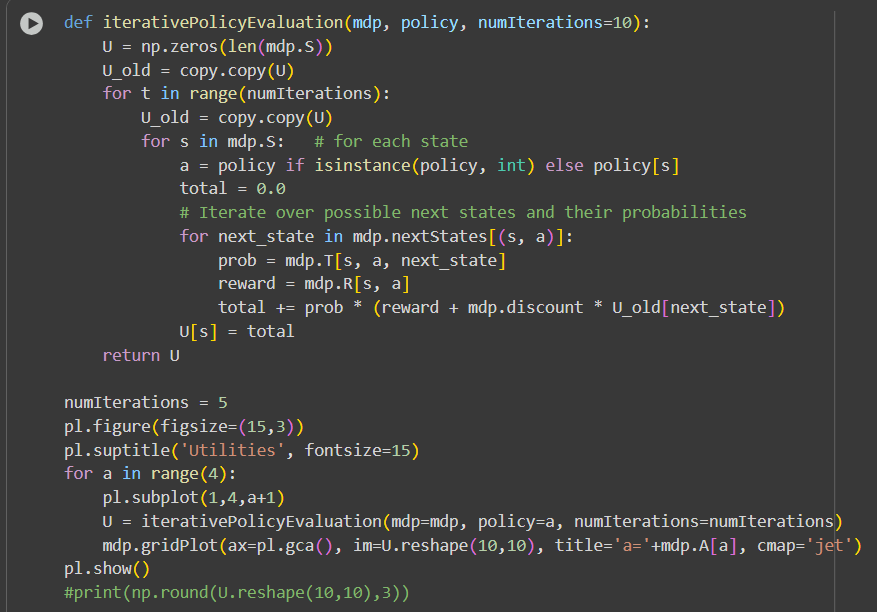

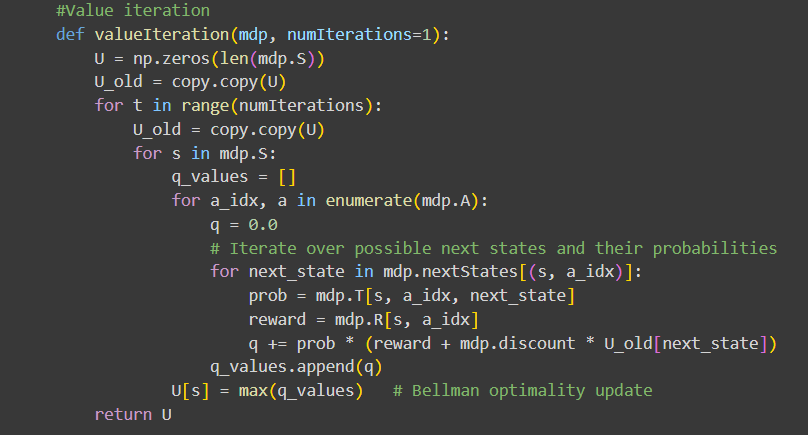

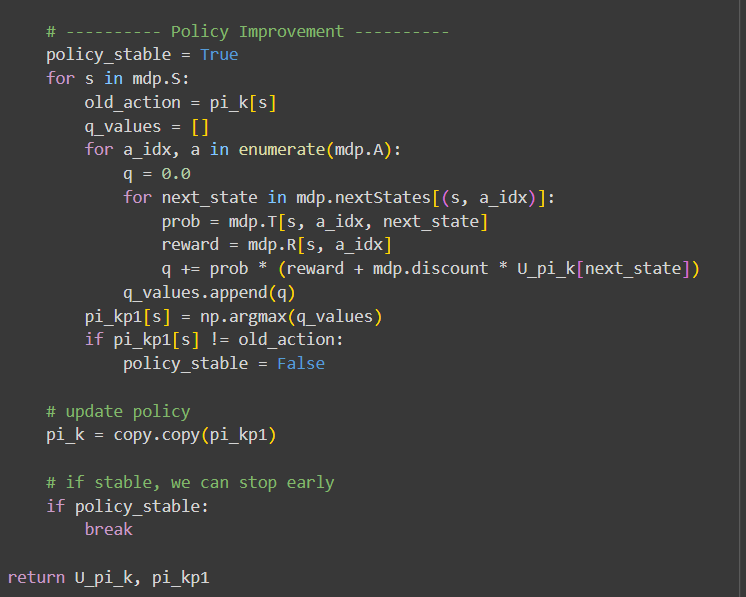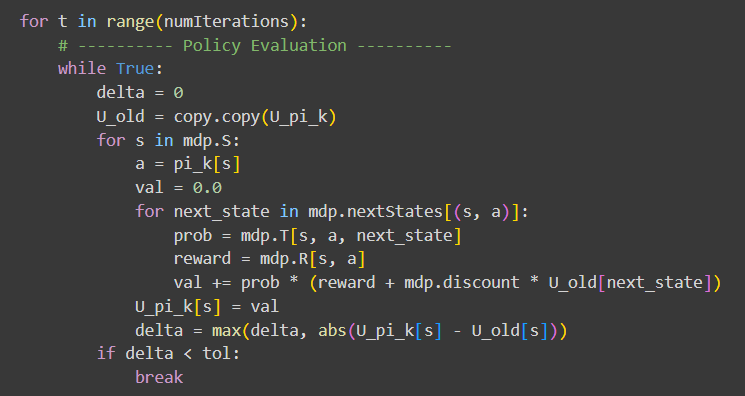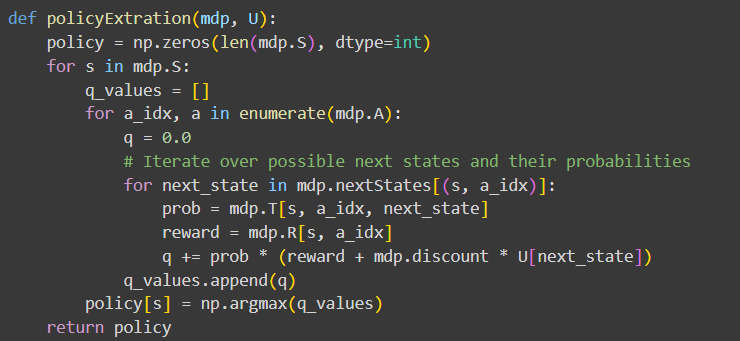

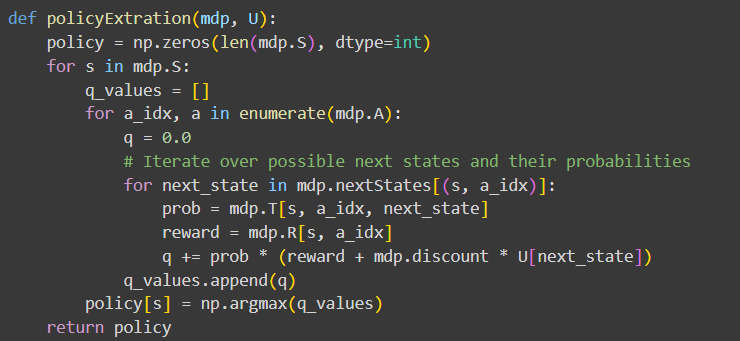

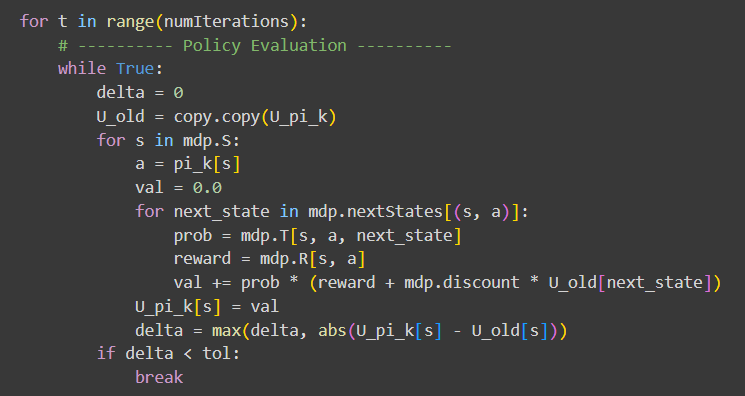

Running Policy Iteration...
Policy Iteration finished in 0.2380 seconds
Running Value Iteration...
Value Iteration finished in 0.1965 seconds
Running Q-Learning...
Q-Learning finished in 10.8671 seconds over 5000 episodes


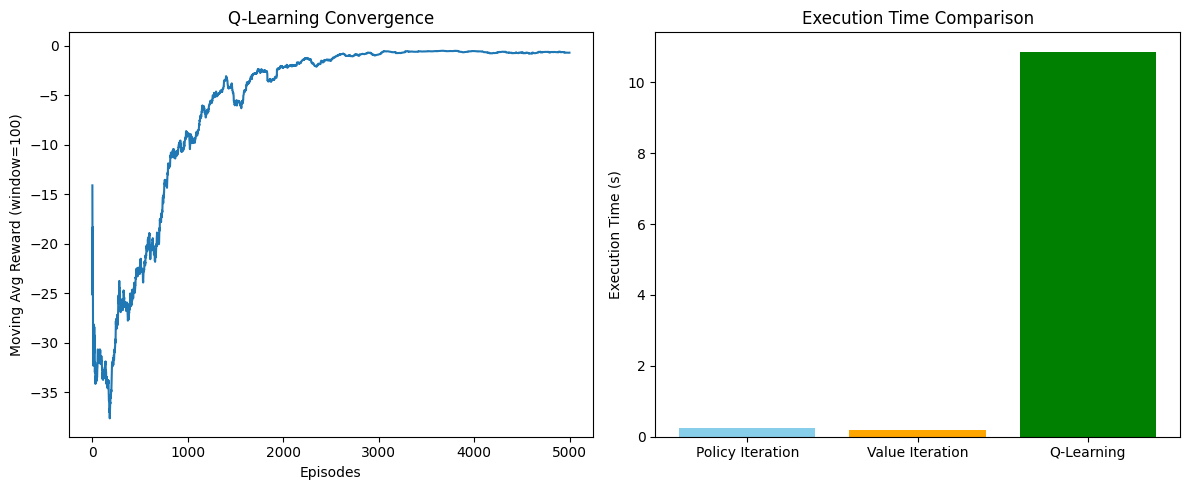

In [37]:
import numpy as np
import time
import matplotlib.pyplot as plt

def build_P(mdp):
    """
    Build transition dictionary P[state][action] =
    [(prob, next_state, reward, done), ...]
    from mdp.T (3D array) and mdp.R (3D or 2D array).
    """
    P = {}
    for s in range(len(mdp.S)):
        P[s] = {}
        for a in range(len(mdp.A)):
            P[s][a] = []
            for s2 in range(len(mdp.S)):
                prob = mdp.T[s, a, s2]   # transition probability
                if prob > 0:
                    # reward can be 3D (s,a,s') or 2D (s,a)
                    try:
                        reward = mdp.R[s, a, s2]
                    except:
                        reward = mdp.R[s, a]
                    done = (s2 in mdp.terminals) if hasattr(mdp, "terminals") else False
                    P[s][a].append((prob, s2, reward, done))
    return P



class MDPEnvWrapper:
    def __init__(self, mdp):
        # ensure mdp has .P
        if not hasattr(mdp, "P"):
            mdp.P = build_P(mdp)

        self.mdp = mdp
        self.nS = len(mdp.S)
        self.nA = len(mdp.A)
        self.state = 0  # initial state

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        state = self.state
        possible_transitions = self.mdp.P[state][action]

        # If no transitions are defined (terminal or invalid action)
        if len(possible_transitions) == 0:
            return state, 0.0, True, {}

        # Sample next state based on probabilities
        probs = [tr[0] for tr in possible_transitions]
        idx = np.random.choice(len(possible_transitions), p=np.array(probs))
        prob, next_state, reward, done = possible_transitions[idx]

        self.state = next_state
        return next_state, reward, done, {}


# ---- Comparison Function ----
def compare_algorithms(mdp, episodes_q=5000, gamma=0.99):
    results = {}

    # ---- Policy Iteration ----
    print("Running Policy Iteration...")
    t0 = time.perf_counter()
    U_pi, pi_policy = policyIteration(mdp, numIterations=100)
    pi_time = time.perf_counter() - t0
    results['policy_iteration'] = {
        'U': U_pi,
        'policy': pi_policy,
        'time': pi_time
    }
    print(f"Policy Iteration finished in {pi_time:.4f} seconds")

    # ---- Value Iteration ----
    print("Running Value Iteration...")
    t0 = time.perf_counter()
    U_vi = valueIteration(mdp, numIterations=100)
    pi_vi = policyExtration(mdp, U_vi)
    vi_time = time.perf_counter() - t0
    results['value_iteration'] = {
        'U': U_vi,
        'policy': pi_vi,
        'time': vi_time
    }
    print(f"Value Iteration finished in {vi_time:.4f} seconds")

    # ---- Q-Learning ----
    print("Running Q-Learning...")
    env = MDPEnvWrapper(mdp)
    t0 = time.perf_counter()
    Q, q_stats = q_learning(env, num_episodes=episodes_q, alpha=0.1, gamma=gamma,
                            epsilon_start=1.0, epsilon_end=0.01,
                            epsilon_decay_steps=int(episodes_q*0.6),
                            max_steps_per_episode=200)
    q_time = time.perf_counter() - t0
    q_policy = np.argmax(Q, axis=1)
    results['q_learning'] = {
        'Q': Q,
        'policy': q_policy,
        'time': q_time,
        'stats': q_stats
    }
    print(f"Q-Learning finished in {q_time:.4f} seconds over {episodes_q} episodes")

    return results


# ---- Plot Comparison ----
def plot_comparison(results):
    plt.figure(figsize=(12,5))

    # Q-Learning convergence
    plt.subplot(1,2,1)
    plt.plot(results['q_learning']['stats']['avg_rewards'])
    plt.xlabel("Episodes")
    plt.ylabel("Moving Avg Reward (window=100)")
    plt.title("Q-Learning Convergence")

    # Runtime bar chart
    plt.subplot(1,2,2)
    algos = ['Policy Iteration','Value Iteration','Q-Learning']
    times = [results['policy_iteration']['time'],
             results['value_iteration']['time'],
             results['q_learning']['time']]
    plt.bar(algos, times, color=['skyblue','orange','green'])
    plt.ylabel("Execution Time (s)")
    plt.title("Execution Time Comparison")

    plt.tight_layout()
    plt.show()


results = compare_algorithms(mdp, episodes_q=5000, gamma=0.99)
plot_comparison(results)


##Model-Based RL

Knows the environment’s model → transition probabilities P(s'|s,a) and rewards R(s,a).

Uses planning algorithms like Policy Iteration or Value Iteration.

Learns by computing the optimal policy directly from the known model, without trial-and-error interaction.

Example: Dynamic Programming methods.

##Model-Free RL

Doesn’t know the environment’s model (no P or R).

Learns only by interacting with the environment and updating values from experience.

Uses trial-and-error to estimate action values (Q(s,a)) and derive the policy.

Example: Q-Learning, SARSA.

#Lab7 Part2

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

# Define the Neural Network for Q-value approximation
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(torch.relu(self.fc2(x))) # Apply relu to the output of fc2
        return self.fc3(x)

# Replay buffer for experience replay
class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        # Convert to numpy arrays and then to torch tensors
        states = np.array(states)
        next_states = np.array(next_states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        dones = np.array(dones)

        return states, actions, rewards, next_states, dones

    def __len__(self):
        return len(self.buffer)

In [48]:
def select_action(state, epsilon, q_network, action_dim):
    if random.random() < epsilon:
        return random.randint(0, action_dim - 1)  # Explore
    else:
        state = np.array(state, dtype=np.float32)        # ensure array
        state = torch.tensor(state).unsqueeze(0)         # add batch dimension
        q_values = q_network(state)
        return q_values.argmax().item()

In [49]:
def train_dqn(env, episodes=500, epsilon=0.1, gamma=0.99, batch_size=64, lr=0.001):
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    q_network = DQN(state_dim, action_dim)
    target_network = DQN(state_dim, action_dim)
    target_network.load_state_dict(q_network.state_dict())

    optimizer = optim.Adam(q_network.parameters(), lr=lr)
    replay_buffer = ReplayBuffer()

    rewards_per_episode = []

    for episode in range(episodes):
        # Reset environment (handle both old & new Gym APIs)
        reset_result = env.reset()
        if isinstance(reset_result, tuple):  # Gym >= 0.26
            state, _ = reset_result
        else:  # Gym < 0.26
            state = reset_result

        total_reward = 0
        done = False

        while not done:
            state = np.array(state, dtype=np.float32)
            action = select_action(state, epsilon, q_network, action_dim)

            # Step (handle both old & new Gym APIs)
            step_result = env.step(action)
            if len(step_result) == 5:  # Gym >= 0.26
                next_state, reward, terminated, truncated, _ = step_result
                done = terminated or truncated
            else:  # Gym < 0.26
                next_state, reward, done, _ = step_result

            replay_buffer.push(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            # Training step
            if len(replay_buffer) > batch_size:
                states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)

                states = torch.FloatTensor(states)
                actions = torch.LongTensor(actions).unsqueeze(1)
                rewards = torch.FloatTensor(rewards).unsqueeze(1)
                next_states = torch.FloatTensor(next_states)
                dones = torch.FloatTensor(dones).unsqueeze(1)

                # Current Q estimates
                q_values = q_network(states).gather(1, actions)

                # Next Q values (from target network)
                with torch.no_grad():
                    next_q_values = target_network(next_states).max(1)[0].unsqueeze(1)
                    target_q = rewards + gamma * next_q_values * (1 - dones)

                # Loss
                loss = nn.MSELoss()(q_values, target_q)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        rewards_per_episode.append(total_reward)

        # Update target network every 10 episodes
        if episode % 10 == 0:
            target_network.load_state_dict(q_network.state_dict())

    return rewards_per_episode

/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


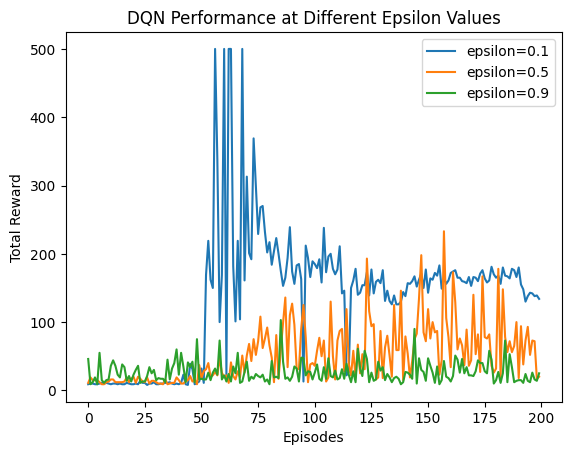

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [52]:
import gym
import matplotlib.pyplot as plt
import numpy as np
if not hasattr(np, "bool8"):
    np.bool8 = np.bool_


env = gym.make("CartPole-v1")

epsilons = [0.1, 0.5, 0.9]
results = {}

for eps in epsilons:
    rewards = train_dqn(env, episodes=200, epsilon=eps)
    results[eps] = rewards

# Plot
for eps, rewards in results.items():
    plt.plot(rewards, label=f"epsilon={eps}")

plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("DQN Performance at Different Epsilon Values")
plt.legend()
plt.show()